## <center>CITS5508 Lab sheet 2: Implementing a simple classification task</center>

**File name: Labsheet2.ipynb**<br>
**Date:** March 2024<br>

This is an example notebook to help you implement the tasks required for this lab sheet. 

We have provided some ideas to help you. Use the unit content and your thinking to create the several necessary steps. 

You will develop Python code for a simple classification task in this lab sheet. Certify that the presentation of your Python notebook is good and that you used the Markdown cells well. Make sure you properly format your plots and results. For instance, all your diagrams/plots should have proper axis labels and titles to help the reader understand what you are plotting. Another example is the confusion matrix; not showing the class names makes the confusion matrix completely useless. Use the lab sheets to learn how to improve the presentation of your notebook, as you will need this in the assessments. 

### Importing the libraries

In [1]:
#You may need to add other libraries here depending on your code

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# to display plots in Jupyter notebook
%matplotlib inline

plt.rcParams['font.size'] = '12'

### 1. Loading the data

Load the data and create your training and test datasets.

In [2]:
#Hint: Look at the function pd.read_csv()
train_path="C:/Users/adhar/Desktop/sem3/cits5508/training.csv"
test_path="C:/Users/adhar/Desktop/sem3/cits5508/testing.csv"
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)
#df_train = ...
#df_test = ...

### 2. Quick inspecting the data

Inspect what the columns are. Try the different options as discussed in lectures (e.g. head() and info() functions). Don't forget to use appropriate formatting in your output answers. What can you observe? Are there any issues with the data?

In [3]:
column_headings = df_train.columns
df_train.head()
#format your print, e.g.
print('Column headings are: ',column_headings)
df_train.info()
# ... 

Column headings are:  Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                 

### 3. Removing some columns from the dataset

We are going to drop all the columns *pred_minus_obs...*, i.e., we keep only the first 10 columns: the *class* column and the columns b1, b2, ..., b9. Don't forget to apply these changes to the training and test sets. 

In [12]:
#You need to create a code to remove the undesired columns from the training and testing sets. After that,
#inspect what your datasets look like. Do you have the correct data matrix structure (that is, rows represent the examples 
#and columns represent the attributes?
'''columns_to_remove = ['pred_minus_obs_H_b1',
                     'pred_minus_obs_H_b2',
                     'pred_minus_obs_H_b3',
                     'pred_minus_obs_H_b4',
                     'pred_minus_obs_H_b5',
                     'pred_minus_obs_H_b6',
                     'pred_minus_obs_H_b7',
                     'pred_minus_obs_H_b8',
                     'pred_minus_obs_H_b9',
                     'pred_minus_obs_S_b1',
                     'pred_minus_obs_S_b2',
                     'pred_minus_obs_S_b3',
                     'pred_minus_obs_S_b4',
                     'pred_minus_obs_S_b5',
                     'pred_minus_obs_S_b6',
                     'pred_minus_obs_S_b7',
                     'pred_minus_obs_S_b8',
                     'pred_minus_obs_S_b9']
df_train.drop(columns=columns_to_remove,inplace=True)
df_test.drop(columns=columns_to_remove,inplace=True)'''
df_train.info()
df_test.info()

#...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   325 non-null    object
 1   b1      325 non-null    int64 
 2   b2      325 non-null    int64 
 3   b3      325 non-null    int64 
 4   b4      325 non-null    int64 
 5   b5      325 non-null    int64 
 6   b6      325 non-null    int64 
 7   b7      325 non-null    int64 
 8   b8      325 non-null    int64 
 9   b9      325 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   198 non-null    object
 1   b1      198 non-null    int64 
 2   b2      198 non-null    int64 
 3   b3      198 non-null    int64 
 4   b4      198 non-null    int64 
 5   b5      198 non-null    int64 
 6   b6      198 no

### 4. Counting the number of instances in each class

According to the UCI Machine Learning website, this dataset has 4 class labels given in the first column of the csv file: Class: *s* ('Sugi' forest), *h* ('Hinoki' forest), *d* ('Mixed deciduous' forest), *o* ('Other' non-forest land). Write Python code to count instances/examples for each class label in your datasets. Are they imbalanced? 

In [21]:
# ...
df_train["class"].value_counts()
#df_test["class"].value_counts()
#df_train["b1"].value_counts()

class
s    136
d    105
o     46
h     38
Name: count, dtype: int64

### 5. Doing some data visualisation 

Use appropriate functions to display (visualise) the different features (attributes/columns). You can also incorporate class information. Do you observe any aspect of the data that should be addressed?

array([[<Axes: title={'center': 'b1'}>, <Axes: title={'center': 'b2'}>,
        <Axes: title={'center': 'b3'}>],
       [<Axes: title={'center': 'b4'}>, <Axes: title={'center': 'b5'}>,
        <Axes: title={'center': 'b6'}>],
       [<Axes: title={'center': 'b7'}>, <Axes: title={'center': 'b8'}>,
        <Axes: title={'center': 'b9'}>]], dtype=object)

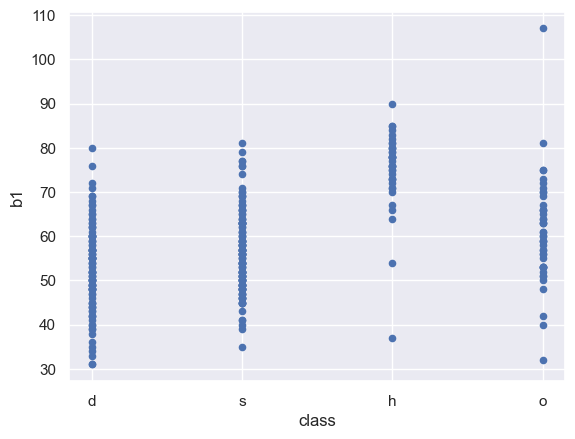

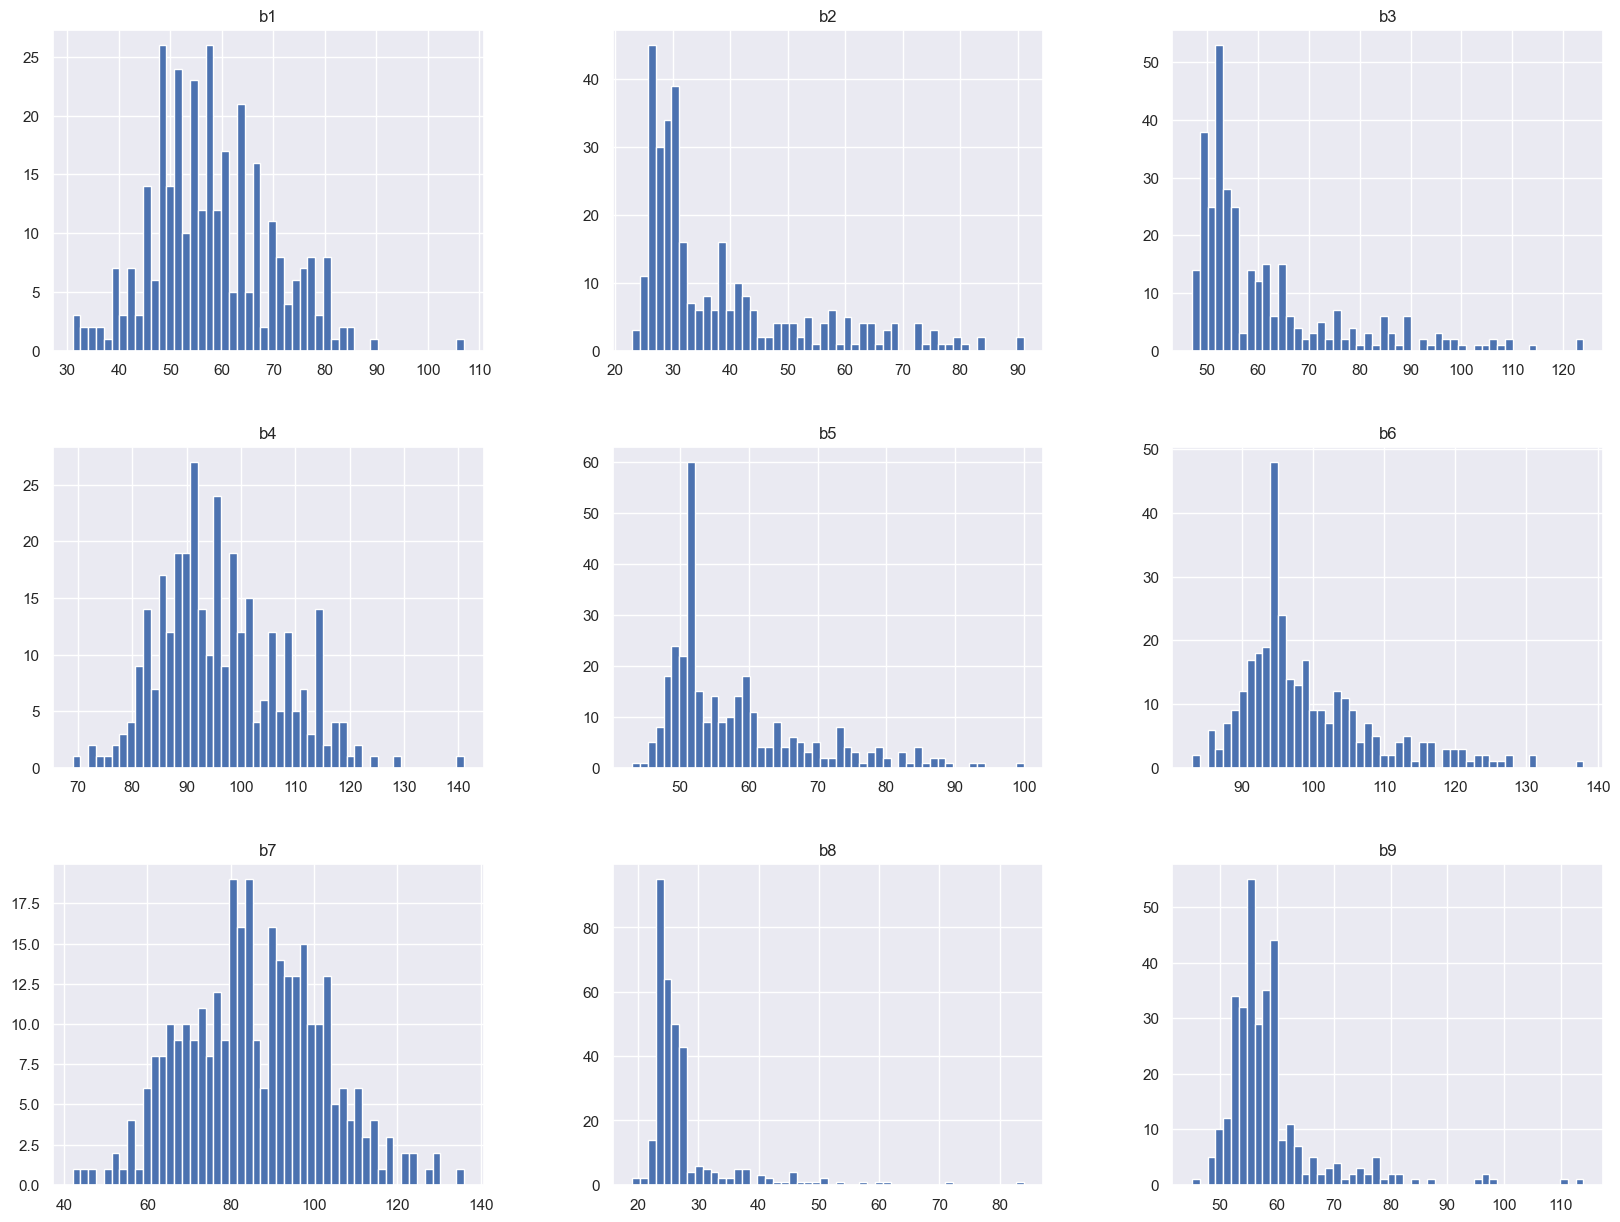

In [20]:
# Tip: explore different options, like histograms, scatter plots, etc. Check out how to make some nice plots with the seaborn package.
sb.set_theme()
df_train.plot(kind='scatter',x='class',y='b1')
df_train.hist(bins=50,figsize=(20,15))
#...

### 6. Preparing the data for a binary classification

We will do a multiclass classification on this dataset later. For now, we will start with a binary classification. Update your training and testing sets to contain only examples from two classes: "s" ("Sugi" forest) and  "d" ("Mixed deciduous" forest).

In [ ]:
# ...

### 7. Using the Logistic Regression

Use the **Logistic Regression Classifier** implemented in **sklearn.linear\_model** class to perform a binary classification on the updated datasets. Try also to implement your version of the Logistic Regression (do you arrive at similar results as the package?). Implementing your version is the best way to learn. 

In [ ]:
# ...

### 8. Inspecting performance indicators

Write Python code to show results for: 

- The accuracy values for the training set and the test set.
- The confusion matrix on the training and testing set.  
- The plot of precision versus recall for the training set.

Make sure you format the output properly. 

In [ ]:
# ...

### *Optional, but may be covered in assessments.*

### 9. Plotting the estimated probabilities and decision boundary of the Logistic Regression model. 

Consider two individual features in our dataset. We will use them to examine the estimated probabilities and decision boundary of the Logistic Regression model. You can choose which ones and/or experiment with different pairs of features. For each pair, you should create a new version of your training set using these two features only.

Also, to plot the Logistic Regression Classifier's estimated probabilities and decision boundary (as in Figure 4.23 of the textbook), considering these two individual features, you will need to create a Logistic Regression model for each feature. Hence, you are to provide two plots.

In [ ]:
# ...

Based on your plots, comment about: 

- What threshold would you choose for classification based on the predicted probabilities?
- What is the impact of changing the threshold for performance indicators such as precision and recall?
- What can you say about the overlap between classes, and how does this impact classification performance?